In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [31]:
sales_df = pd.read_excel("Sales.xlsx", sheet_name= 'Sales')
sales_df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [4]:
sales_df.iloc[:, 1:].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AgentBonus,4520,NaN,NaN,NaN,4077.84,1403.32,1605,3027.75,3911.5,4867.25,9608
Age,4251,NaN,NaN,NaN,14.4947,9.03763,2,7,13,20,58
CustTenure,4294,NaN,NaN,NaN,14.469,8.96367,2,7,13,20,57
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520,NaN,NaN,NaN,3.68894,1.01577,1,3,4,4,6
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPolicy,4475,NaN,NaN,NaN,3.56536,1.45593,1,2,4,5,6


In [5]:
for i in sales_df.columns:
    if(sales_df[i].dtype == 'object'):
        print(i, ":" , sales_df[i].unique())

Channel : ['Agent' 'Third Party Partner' 'Online']
Occupation : ['Salaried' 'Free Lancer' 'Small Business' 'Laarge Business'
 'Large Business']
EducationField : ['Graduate' 'Post Graduate' 'UG' 'Under Graduate' 'Engineer' 'Diploma'
 'MBA']
Gender : ['Female' 'Male' 'Fe male']
Designation : ['Manager' 'Exe' 'Executive' 'VP' 'AVP' 'Senior Manager']
MaritalStatus : ['Single' 'Divorced' 'Unmarried' 'Married']
Zone : ['North' 'West' 'East' 'South']
PaymentMethod : ['Half Yearly' 'Yearly' 'Quarterly' 'Monthly']


In [32]:
#replacing the duplicate words in Gender, Occupation, EducationField & Designation variable

sales_df.Gender.replace('Fe male', 'Female', inplace = True)
print(sales_df.Gender.unique())

sales_df.Occupation.replace('Laarge Business', 'Large Business', inplace = True)
print(sales_df.Occupation.unique())


sales_df.EducationField.replace('UG', 'Under Graduate', inplace = True)
print(sales_df.EducationField.unique())

sales_df.MaritalStatus.replace('Single', 'Single/Unmarried', inplace = True)


sales_df.MaritalStatus.replace('Unmarried', 'Single/Unmarried', inplace = True)
print(sales_df.MaritalStatus.unique())


sales_df.Designation.replace('Exe', 'Executive', inplace = True)


sales_df.Designation.replace('VP', 'AVP-VP', inplace = True)


sales_df.Designation.replace('AVP', 'AVP-VP', inplace = True)
print(sales_df.Designation.unique())

['Female' 'Male']
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
['Graduate' 'Post Graduate' 'Under Graduate' 'Engineer' 'Diploma' 'MBA']
['Single/Unmarried' 'Divorced' 'Married']
['Manager' 'Executive' 'AVP-VP' 'Senior Manager']


In [7]:
#checking for duplicates
sales_df.iloc[:, 1:].duplicated().sum()

0

In [8]:
#checking for missing values
sales_df.isna().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

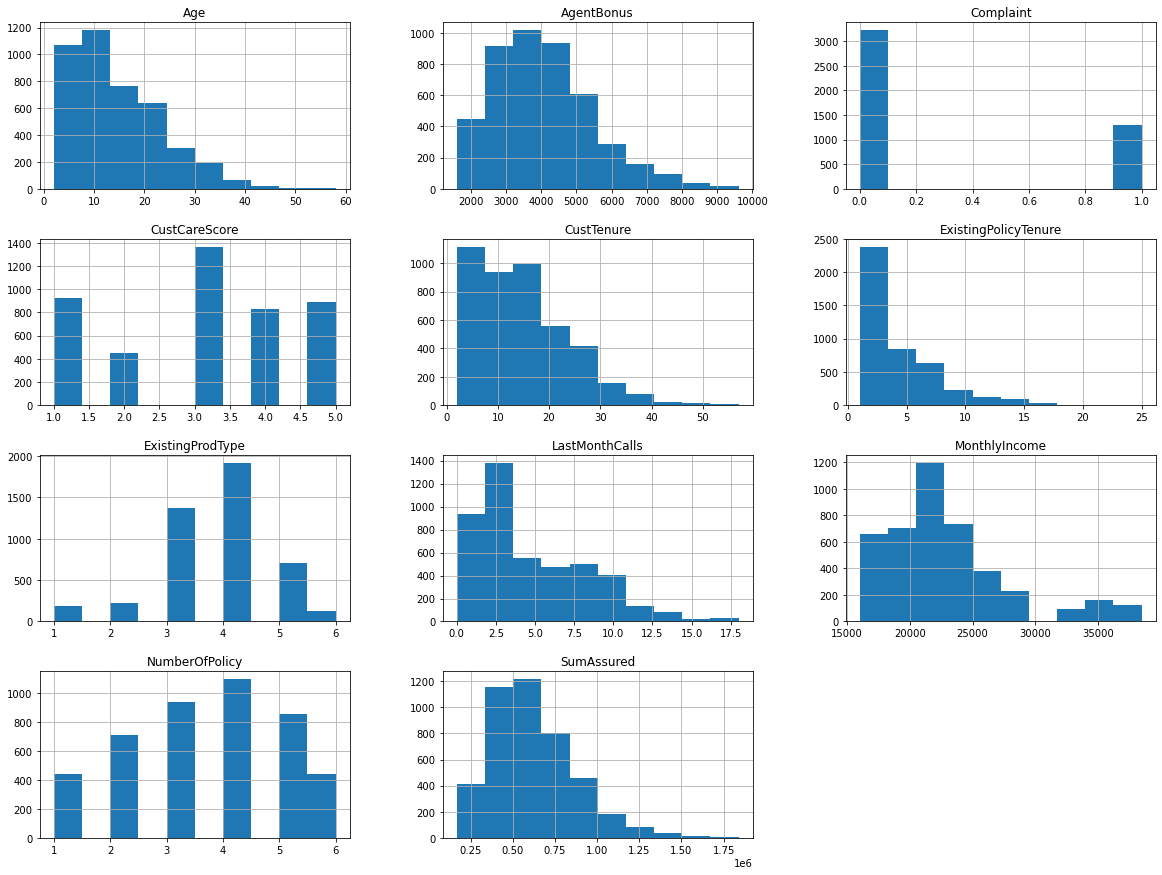

In [9]:
sales_df.iloc[:, 1:].hist(figsize = (20,15))
plt.show()

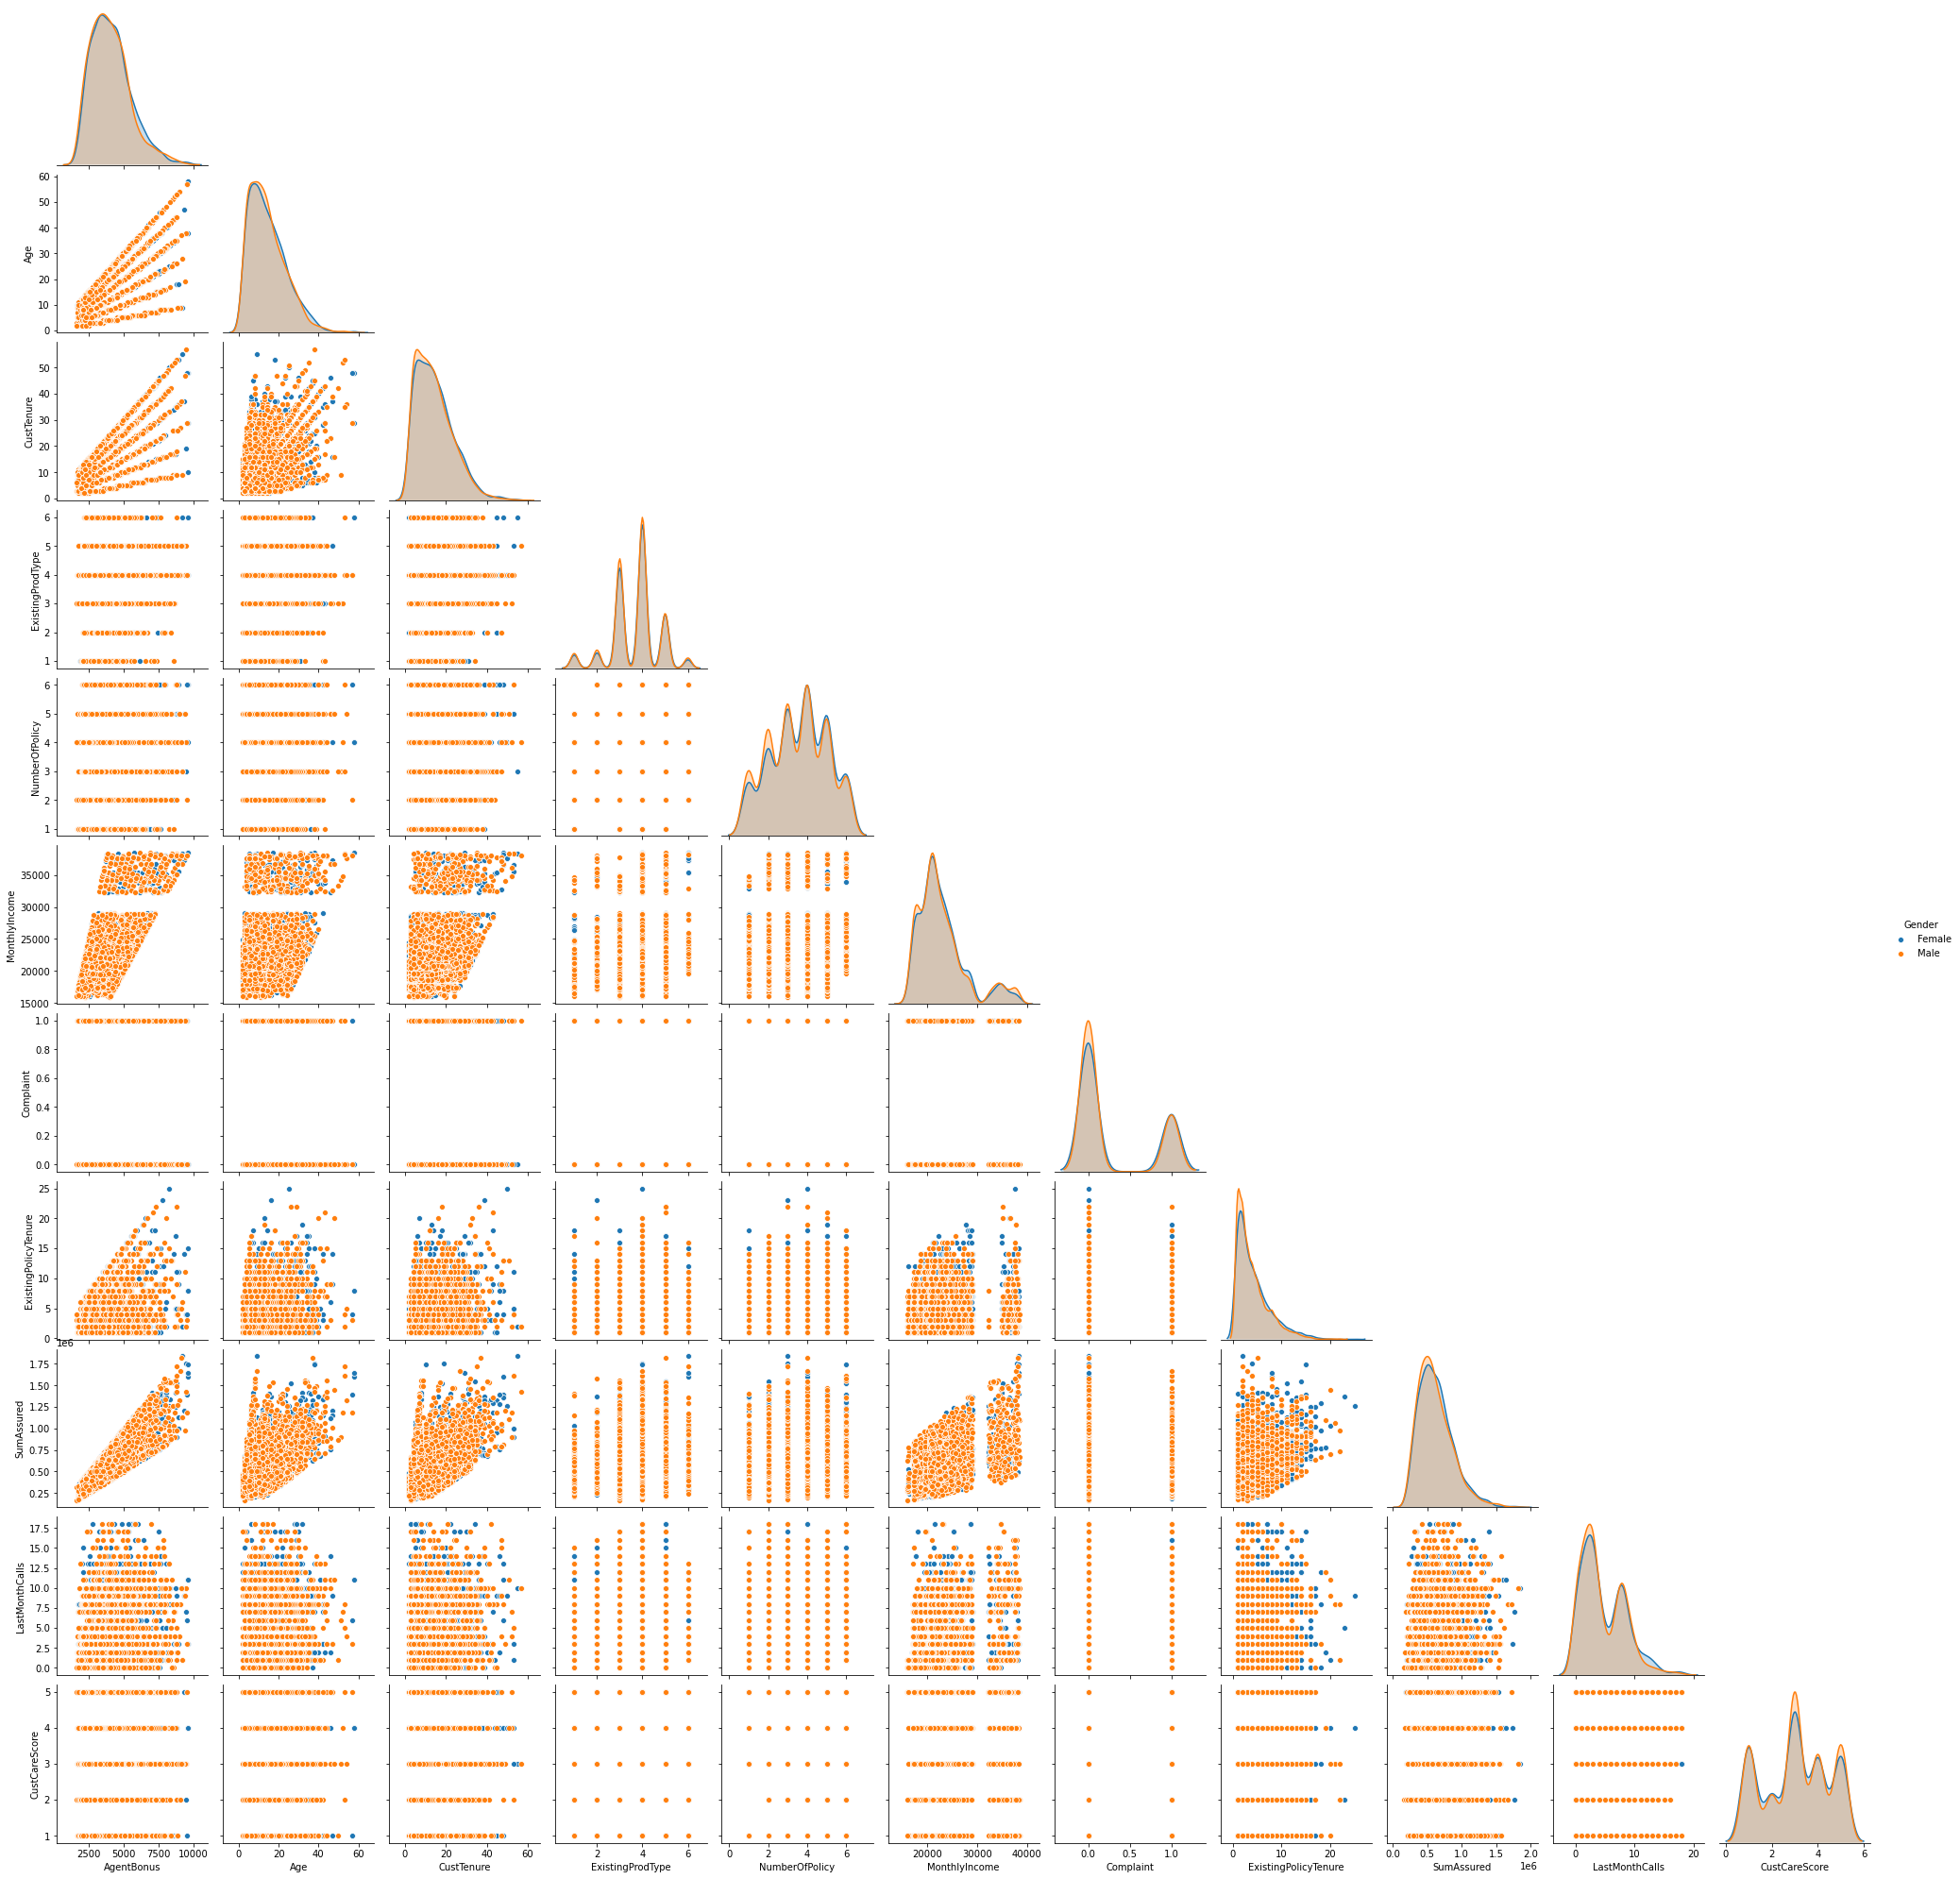

In [127]:
sns.pairplot(sales_df.iloc[:, 1:], corner= True, hue = 'Gender')
plt.show()

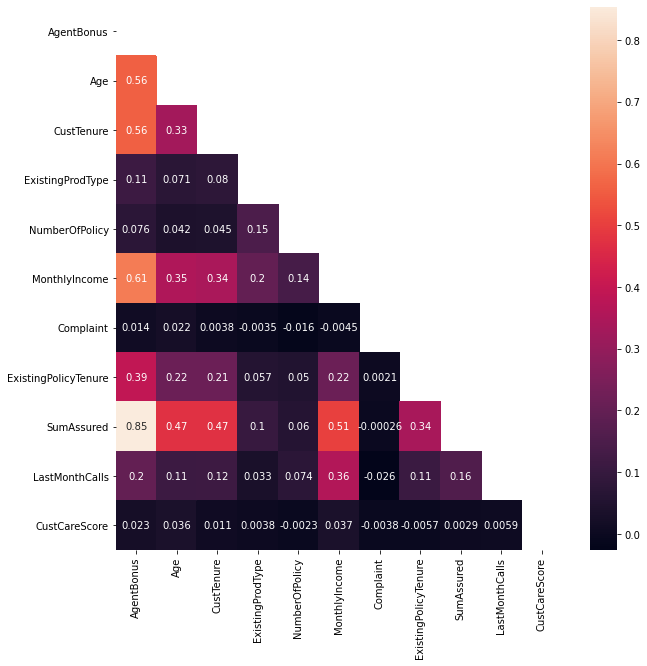

In [128]:
plt.figure(figsize= (10,10))
mask = np.zeros_like(sales_df.iloc[:, 1:].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(sales_df.iloc[:, 1:].corr(), annot = True, mask = mask)
plt.show()

Top 5 strong correlations:
    
    - SumAssured & AgentBonus
    - MonthlyIncome & AgentBonus
    - CustTenure & AgentBonus
    - Age & AgentBonus
    - MonthlyIncome & SumAssured

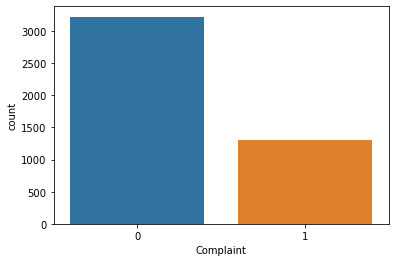

0    0.712832
1    0.287168
Name: Complaint, dtype: float64


In [10]:
sns.countplot(sales_df.Complaint)
plt.show()
print(sales_df.Complaint.value_counts(normalize = True))

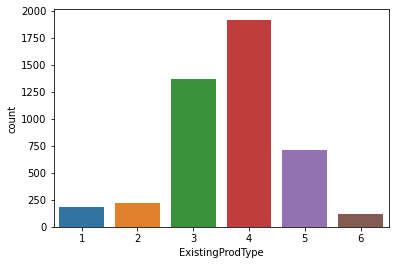

4    0.423894
3    0.302876
5    0.156637
2    0.048894
1    0.040487
6    0.027212
Name: ExistingProdType, dtype: float64


In [11]:
sns.countplot(sales_df.ExistingProdType)
plt.show()
print(sales_df.ExistingProdType.value_counts(normalize = True))

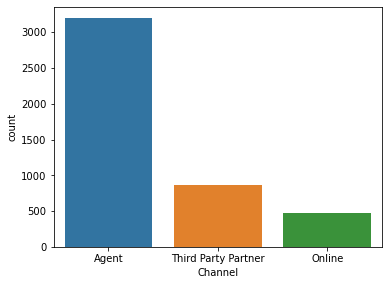

Agent                  0.706637
Third Party Partner    0.189823
Online                 0.103540
Name: Channel, dtype: float64


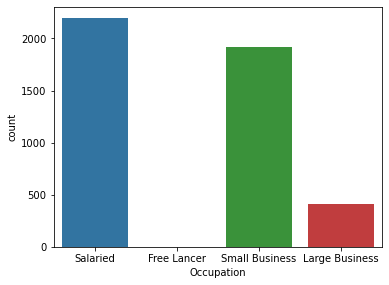

Salaried          0.484956
Small Business    0.424336
Large Business    0.090265
Free Lancer       0.000442
Name: Occupation, dtype: float64


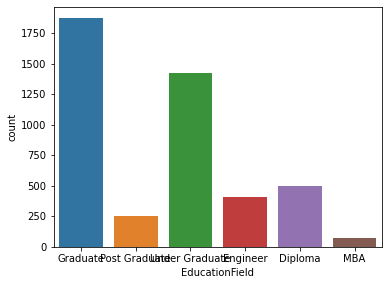

Graduate          0.413717
Under Graduate    0.314159
Diploma           0.109735
Engineer          0.090265
Post Graduate     0.055752
MBA               0.016372
Name: EducationField, dtype: float64


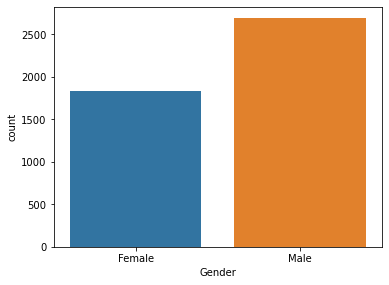

Male      0.59469
Female    0.40531
Name: Gender, dtype: float64


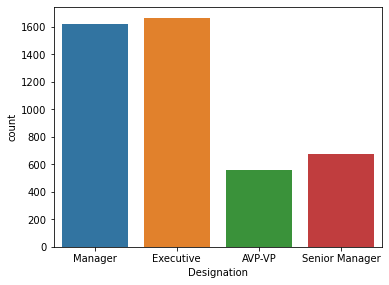

Executive         0.367699
Manager           0.358407
Senior Manager    0.149558
AVP-VP            0.124336
Name: Designation, dtype: float64


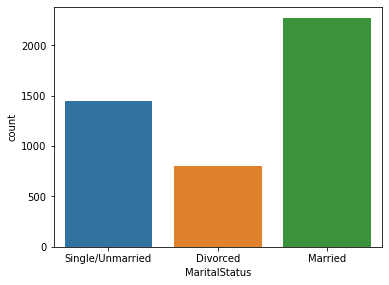

Married             0.501770
Single/Unmarried    0.320354
Divorced            0.177876
Name: MaritalStatus, dtype: float64


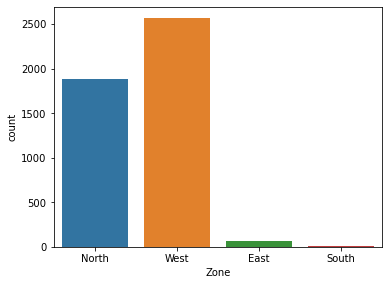

West     0.567699
North    0.416814
East     0.014159
South    0.001327
Name: Zone, dtype: float64


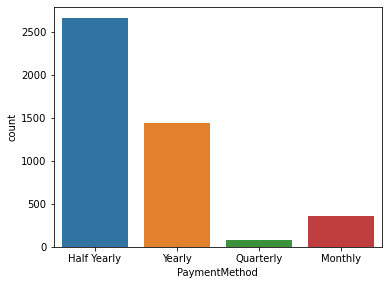

Half Yearly    0.587611
Yearly         0.317257
Monthly        0.078319
Quarterly      0.016814
Name: PaymentMethod, dtype: float64


In [131]:
i= 1

for col in sales_df.columns:
    if(sales_df[col].dtype == 'object'):
        fig = plt.figure(figsize= (20,15))
        ax = plt.subplot(3,3, i)
        sns.countplot(sales_df[col], ax = ax,linewidth=10)
        plt.show()
        print(sales_df[col].value_counts(normalize= True))
        i = i+1

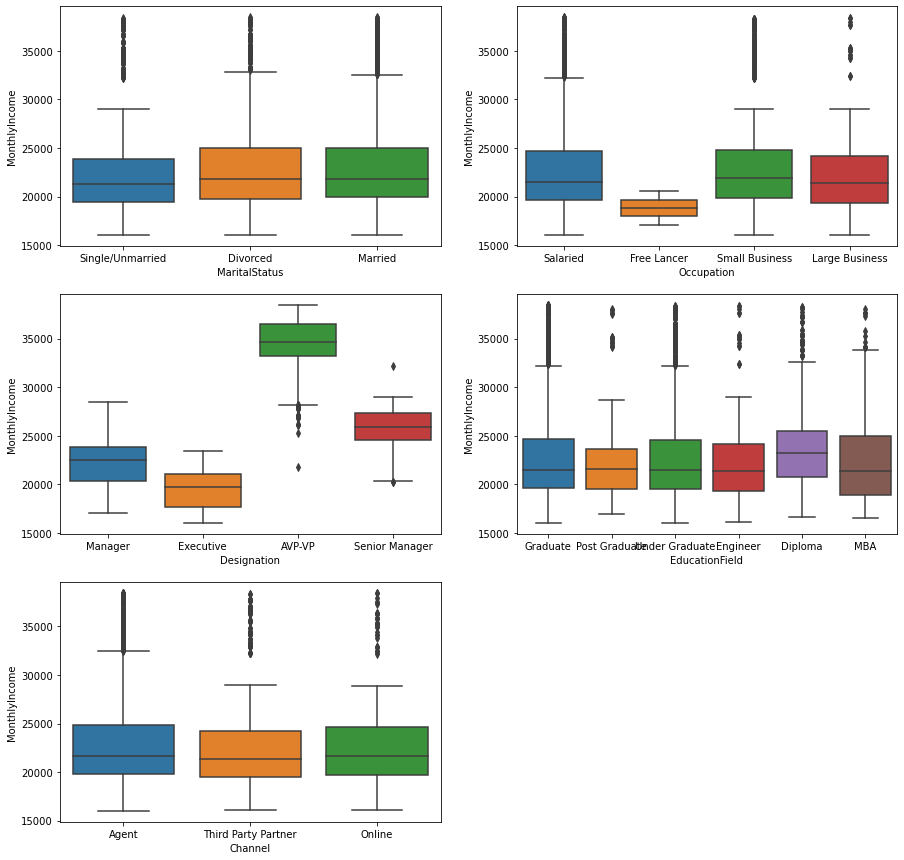

In [132]:
#relation between MonthlyIncome & categorical variables
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(sales_df.MaritalStatus, sales_df.MonthlyIncome)
plt.subplot(3,2,2)
sns.boxplot(sales_df.Occupation, sales_df.MonthlyIncome)
plt.subplot(3,2,3)
sns.boxplot(sales_df.Designation, sales_df.MonthlyIncome)
plt.subplot(3,2,4)
sns.boxplot(sales_df.EducationField, sales_df.MonthlyIncome)
plt.subplot(3,2,5)
sns.boxplot(sales_df.Channel, sales_df.MonthlyIncome)
plt.show()

Customer Designation creates clear groups for MonthlyIncome of the customer
so Missing Values in MonthlyIncome will be filled considering means of every group

# Missing Value Imputation

In [33]:
#Substituing Missing values for MonthlyIncome
sales_df.groupby('Designation').mean()['MonthlyIncome']

Designation
AVP-VP            34377.114416
Executive         19509.678099
Manager           22228.965432
Senior Manager    25846.513274
Name: MonthlyIncome, dtype: float64

In [34]:
np.where(sales_df.Designation == 'AVP-VP', sales_df.MonthlyIncome, sales_df.MonthlyIncome.fillna(34377.1, inplace = True))

np.where(sales_df.Designation == 'Senior Manager', sales_df.MonthlyIncome, sales_df.MonthlyIncome.fillna(25846.5, inplace = True))

array([None, None, None, ..., None, None, None], dtype=object)

In [35]:
#Mean value imputation for missing values
sales_df.ExistingPolicyTenure.fillna(sales_df.ExistingPolicyTenure.mean(), inplace=True)
sales_df.SumAssured.fillna(sales_df.SumAssured.mean(), inplace=True)
sales_df.Age.fillna(sales_df.Age.mean(), inplace=True)
sales_df.CustTenure.fillna(sales_df.CustTenure.mean(), inplace=True)

In [36]:
#Mode value imputation for missing values
sales_df.NumberOfPolicy.fillna(4, inplace=True)
sales_df.CustCareScore.fillna(3, inplace=True)

In [13]:
sales_df.isna().sum()

CustID                  0
AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

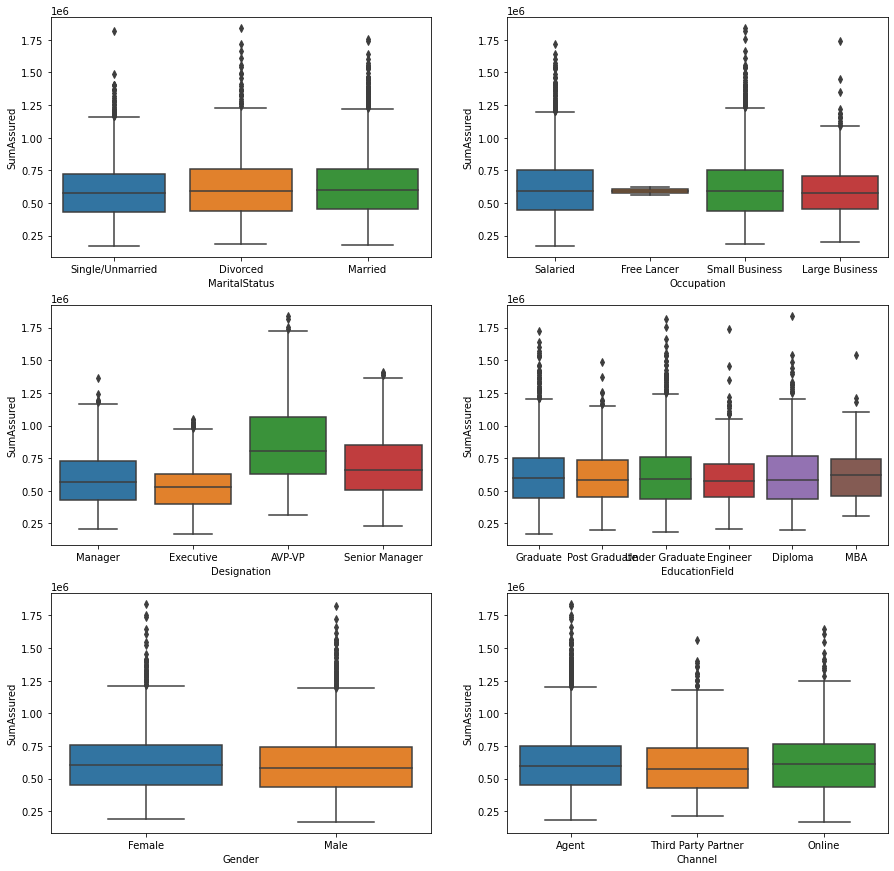

In [138]:
#relation between SumAssured & categorical variables
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(sales_df.MaritalStatus, sales_df.SumAssured)
plt.subplot(3,2,2)
sns.boxplot(sales_df.Occupation, sales_df.SumAssured)
plt.subplot(3,2,3)
sns.boxplot(sales_df.Designation, sales_df.SumAssured)
plt.subplot(3,2,4)
sns.boxplot(sales_df.EducationField, sales_df.SumAssured)
plt.subplot(3,2,5)
sns.boxplot(sales_df.Gender, sales_df.SumAssured)
plt.subplot(3,2,6)
sns.boxplot(sales_df.Channel, sales_df.SumAssured)
plt.show()

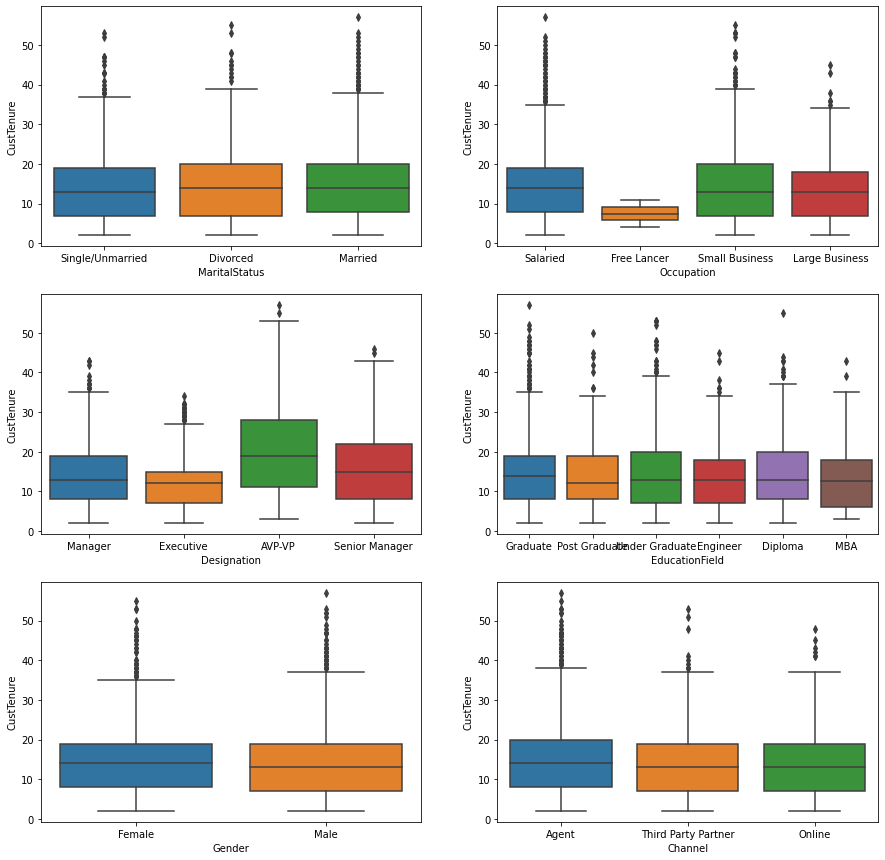

In [139]:
#relation between CustTenure & categorical variables
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(sales_df.MaritalStatus, sales_df.CustTenure)
plt.subplot(3,2,2)
sns.boxplot(sales_df.Occupation, sales_df.CustTenure)
plt.subplot(3,2,3)
sns.boxplot(sales_df.Designation, sales_df.CustTenure)
plt.subplot(3,2,4)
sns.boxplot(sales_df.EducationField, sales_df.CustTenure)
plt.subplot(3,2,5)
sns.boxplot(sales_df.Gender, sales_df.CustTenure)
plt.subplot(3,2,6)
sns.boxplot(sales_df.Channel, sales_df.CustTenure)
plt.show()

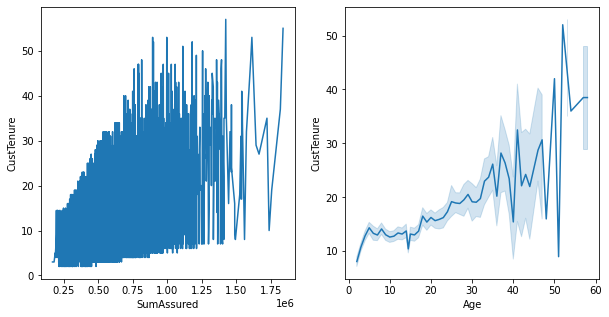

In [140]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(sales_df.SumAssured, sales_df.CustTenure)
plt.subplot(1,2,2)
sns.lineplot(sales_df.Age, sales_df.CustTenure)
plt.show()

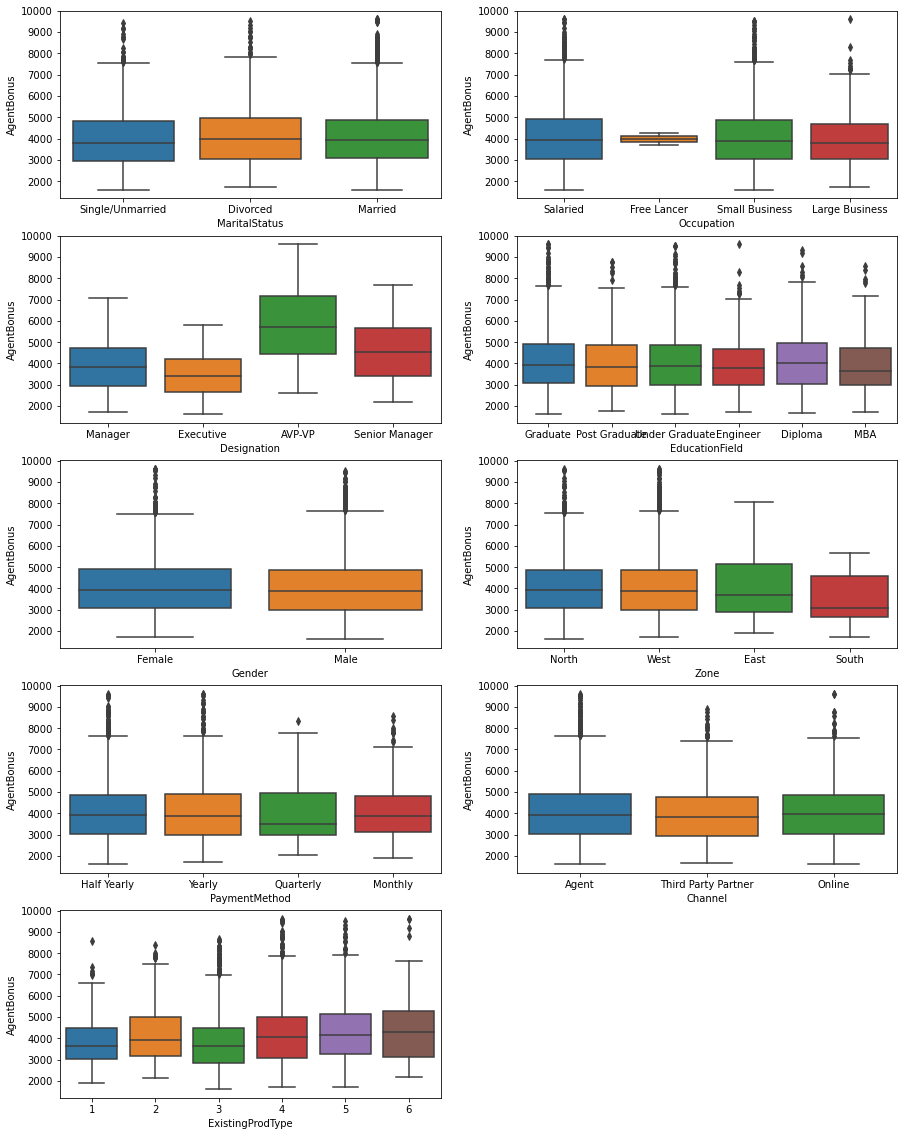

In [141]:
#relation between AgentBonus & categorical variables
plt.figure(figsize=(15,20))
plt.subplot(5,2,1)
sns.boxplot(sales_df.MaritalStatus, sales_df.AgentBonus)
plt.subplot(5,2,2)
sns.boxplot(sales_df.Occupation, sales_df.AgentBonus)
plt.subplot(5,2,3)
sns.boxplot(sales_df.Designation, sales_df.AgentBonus)
plt.subplot(5,2,4)
sns.boxplot(sales_df.EducationField, sales_df.AgentBonus)
plt.subplot(5,2,5)
sns.boxplot(sales_df.Gender, sales_df.AgentBonus)
plt.subplot(5,2,6)
sns.boxplot(sales_df.Zone, sales_df.AgentBonus)
plt.subplot(5,2,7)
sns.boxplot(sales_df.PaymentMethod, sales_df.AgentBonus)
plt.subplot(5,2,8)
sns.boxplot(sales_df.Channel, sales_df.AgentBonus)
plt.subplot(5,2,9)
sns.boxplot(sales_df.ExistingProdType, sales_df.AgentBonus)
plt.show()

The dependant variable AgentBonus show some variation with Designation from above Boxplots, 
but doesn't seem to showany relationship otherwise with other categorical variable. We will test it further with ANOVA

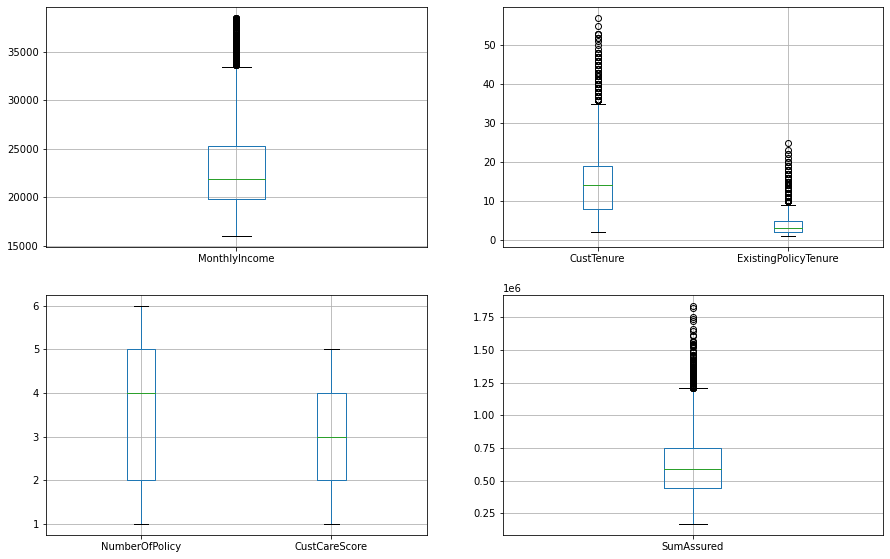

In [142]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sales_df.boxplot(['MonthlyIncome'])
plt.subplot(3,2,2)
sales_df.boxplot(['CustTenure', 'ExistingPolicyTenure'])
plt.subplot(3,2,3)
sales_df.boxplot(['NumberOfPolicy', 'CustCareScore'])
plt.subplot(3,2,4)
sales_df.boxplot(['SumAssured'])
plt.show()

In [14]:
#remove outliers
def remove_outliers(col):
    upper = sales_df[col].quantile(0.75)
    lower = sales_df[col].quantile(0.25) 
    IQR = sales_df[col].quantile(0.75) - sales_df[col].quantile(0.25) 
    sales_df[col] = np.where(sales_df[col] < (lower - 1.5*IQR) , (lower - 1.5*IQR), sales_df[col])
    sales_df[col] = np.where(sales_df[col] > (lower + 1.5*IQR) , (lower + 1.5*IQR), sales_df[col])

In [15]:
remove_outliers('MonthlyIncome') 
remove_outliers('CustTenure') 
remove_outliers('ExistingPolicyTenure') 
remove_outliers('SumAssured')

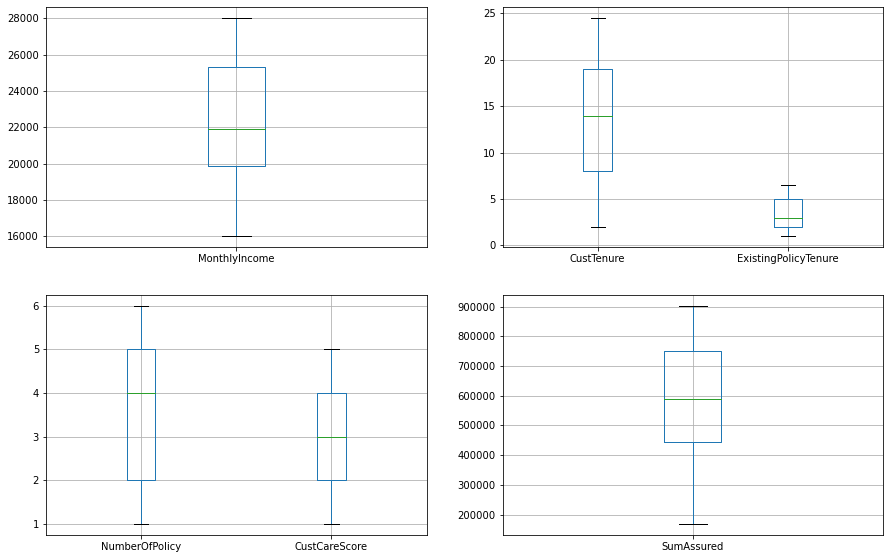

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sales_df.boxplot(['MonthlyIncome'])
plt.subplot(3,2,2)
sales_df.boxplot(['CustTenure', 'ExistingPolicyTenure'])
plt.subplot(3,2,3)
sales_df.boxplot(['NumberOfPolicy', 'CustCareScore'])
plt.subplot(3,2,4)
sales_df.boxplot(['SumAssured'])
plt.show()

#Shapiro-wilk to test the normality of the continuos variables
H0- Data is normal 
H1 - Data is not normal

In [146]:
t, p = stats.shapiro(sales_df['AgentBonus'])
t1, p1 = stats.shapiro(stats.zscore(sales_df['AgentBonus']))
print(t," ", p)
print(t1," ", p1)                     

0.9570314884185791   1.4187508533160892e-34
0.9570330381393433   1.4203979229396827e-34


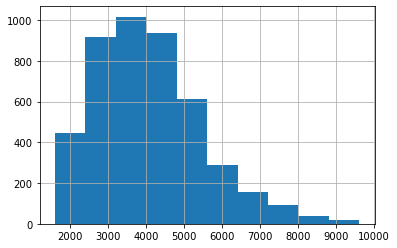

In [248]:
sales_df['AgentBonus'].hist()
plt.show()

(array([ 69., 276., 480., 634., 824., 904., 745., 355., 177.,  56.]),
 array([7.38087904, 7.55982627, 7.7387735 , 7.91772073, 8.09666797,
        8.2756152 , 8.45456243, 8.63350967, 8.8124569 , 8.99140413,
        9.17035136]),
 <a list of 10 Patch objects>)

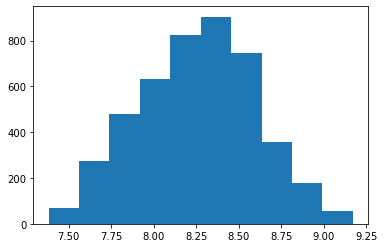

In [148]:
sales_df_ANNOVA = sales_df.copy()

sales_df_ANNOVA['AgentBonus'] = stats.boxcox(sales_df_ANNOVA['AgentBonus'], lmbda = 0)

plt.hist(sales_df_ANNOVA['AgentBonus'])

In [149]:
t, p = stats.shapiro(sales_df_ANNOVA['AgentBonus'])
print(t ,", ", p)

0.9950266480445862 ,  2.562266371297639e-11


The dependant variable was tried to convert into a normal distribution, however the results were still unsuccessfull.
It will be assumed Normal for further ANNOVA test

# ANNOVA

In [150]:
formula = 'AgentBonus ~ C(Channel)+ C(Occupation) + C(LastMonthCalls) +C(Complaint) + C(ExistingProdType) + C(MaritalStatus) + C(EducationField) + C(NumberOfPolicy)+ C(Zone)+ C(CustCareScore) + C(Gender) + C(Designation)'
model = ols(formula, sales_df_ANNOVA).fit()
aov_table = anova_lm(model)
print(aov_table)

                         df      sum_sq    mean_sq           F         PR(>F)
C(Channel)              2.0    0.747771   0.373886    4.462671   1.158297e-02
C(Occupation)           3.0    0.482862   0.160954    1.921135   1.238708e-01
C(LastMonthCalls)      18.0   32.956076   1.830893   21.853413   4.098847e-69
C(Complaint)            1.0    0.148066   0.148066    1.767308   1.837835e-01
C(ExistingProdType)     5.0    4.363999   0.872800   10.417678   5.916756e-10
C(MaritalStatus)        2.0    1.039424   0.519712    6.203244   2.040326e-03
C(EducationField)       5.0    0.122326   0.024465    0.292015   9.176025e-01
C(NumberOfPolicy)       5.0    1.638901   0.327780    3.912362   1.533478e-03
C(Zone)                 3.0    0.302482   0.100827    1.203467   3.068547e-01
C(CustCareScore)        4.0    0.603304   0.150826    1.800248   1.258464e-01
C(Gender)               1.0    0.390978   0.390978    4.666682   3.080631e-02
C(Designation)          3.0  106.997424  35.665808  425.704600  

In [151]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.38
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          2.89e-282
Time:                        12:52:21   Log-Likelihood:                -783.16
No. Observations:                4520   AIC:                             1672.
Df Residuals:                    4467   BIC:                             2012.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                8.5897      0.215     39.886      0.000       8.167       9.012
C(Channel)[T.Online]                    -0.0011      0.015     -0.076      0.940      -0.030       0.027
C(Channel)[T.Third Party Partner]       -0.0149      0.011     -1.319      0.187      -0.037       0.007
C(Occupation)[T.Large Business]         -0.1207      0.215     -0.561      0.575      -0.543       0.301
C(Occupation)[T.Salaried]               -0.1602      0.206     -0.777      0.437      -0.565       0.244
C(Occupation)[T.Small Business]         -0.1426      0.209     -0.682      0.496      -0.553       0.268
C(LastMonthCalls)[T.1]                   0.0723      0.020      3.659      0.000       0.034       0.111
C(LastMonthCalls)[T.2]                   0.0201      0.018      1.090      0.276      -0.016       0.056
C(LastMonthCalls)[T.3]                   0.0832      0.019      4.476      0.000       0.047       0.120
C(LastMonthCalls)[T.4]                   0.0375      0.022      1.739      0.082      -0.005       0.080
C(LastMonthCalls)[T.5]                   0.1132      0.026      4.407      0.000       0.063       0.164
C(LastMonthCalls)[T.6]                   0.1084      0.033      3.270      0.001       0.043       0.173
C(LastMonthCalls)[T.7]                   0.0064      0.021      0.302      0.763      -0.035       0.048
C(LastMonthCalls)[T.8]                   0.0442      0.020      2.188      0.029       0.005       0.084
C(LastMonthCalls)[T.9]                   0.0848      0.024      3.561      0.000       0.038       0.132
C(LastMonthCalls)[T.10]                  0.0515      0.029      1.756      0.079      -0.006       0.109
C(LastMonthCalls)[T.11]                  0.0749      0.037      2.022      0.043       0.002       0.147
C(LastMonthCalls)[T.12]                  0.0329      0.041      0.808      0.419      -0.047       0.113
C(LastMonthCalls)[T.13]                  0.0691      0.044      1.574      0.116      -0.017       0.155
C(LastMonthCalls)[T.14]                  0.0670      0.056      1.203      0.229      -0.042       0.176
C(LastMonthCalls)[T.15]                 -0.0338      0.079     -0.426      0.670      -0.189       0.122
C(LastMonthCalls)[T.16]                  0.0002      0.094      0.003      0.998      -0.183       0.184
C(LastMonthCalls)[T.17]                  0.0004      0.077      0.006      0.996      -0.150       0.151
C(LastMonthCalls)[T.18]                  0.1549      0.086      1.811      0.070      -0.013       0.323
C(Complaint)[T.1]                        0.0092      0.010      0.962      0.336      -0.010       0.028
C(ExistingProdType)[T.2]                 0.0585      0.030      1.977      0.048       0.000       0.117
C(ExistingProdType)[T.3]              

In [152]:
formula1 = 'AgentBonus ~ MonthlyIncome + CustTenure + SumAssured + ExistingPolicyTenure + Age'
model1 = ols(formula1, sales_df_ANNOVA).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     3053.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:52:21   Log-Likelihood:                 1795.1
No. Observations:                4520   AIC:                            -3578.
Df Residuals:                    4514   BIC:                            -3540.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.9569      0.016    443.076      0.000       6.926       6.988
MonthlyIncome         2.034e-05   7.66e-07     26.555      0.000    1.88e-05    2.18e-05
CustTenure               0.0067      0.000     17.539      0.000       0.006       0.007
SumAssured            1.024e-06   1.57e-08     65.127      0.000    9.94e-07    1.06e-06
ExistingPolicyTenure     0.0136      0.001     10.815      0.000       0.011       0.016
Age                      0.0062      0.000     19.750      0.000       0.006       0.007
==============================================================================
Omnibus:                        2.332   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                2.367
Skew:                           0.046   Prob(JB):                        0.306
Kurtosis:                       2.935   Cond. No.                     4.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
sales_df['Age'] = pd.cut(sales_df.Age, 3, labels = ['1-20', '21-39', '40-60'])

sales_df.Age.unique()

[21-39, 1-20, 40-60]
Categories (3, object): [1-20 < 21-39 < 40-60]

In [18]:
#encoding categorical variables
encoded_df = sales_df.copy()

encoded_df['Age'] = pd.Categorical(encoded_df['Age']).codes
encoded_df['Age'].unique()

array([1, 0, 2], dtype=int8)

In [19]:
#encoding categorical variables
for col in encoded_df:
    if encoded_df[col].dtype == 'object':
        encoded_df[col] = pd.Categorical(encoded_df[col]).codes
        print(col, ": ", encoded_df[col].unique())

Channel :  [0 2 1]
Occupation :  [2 0 3 1]
EducationField :  [2 4 5 1 0 3]
Gender :  [0 1]
Designation :  [2 1 0 3]
MaritalStatus :  [2 0 1]
Zone :  [1 3 0 2]
PaymentMethod :  [0 3 2 1]


In [20]:
encoded_df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,1,4.000000,0,2,2,0,3,2,2.0,2,20993.0,1,2.0,806761.000000,1,0,5,2.0
1,7000001,2214,0,2.000000,2,2,2,1,4,2,4.0,0,20130.0,0,3.0,294502.000000,1,3,7,3.0
2,7000002,4273,1,4.000000,0,0,4,1,4,1,3.0,2,17090.0,1,2.0,619999.699267,1,3,0,3.0
3,7000003,1791,0,14.469027,2,2,2,0,3,1,3.0,0,17909.0,1,2.0,268635.000000,3,0,0,5.0
4,7000004,2955,0,14.469027,0,3,5,1,3,1,4.0,0,18468.0,0,4.0,366405.000000,3,0,2,5.0


In [21]:
#zscore scaling
from scipy.stats import zscore
sales_df_scaled = encoded_df.iloc[:, 1:].apply(zscore)
sales_df_scaled.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,0.236010,1.711655,-1.378167,-0.609065,-0.523319,-0.437870,-1.211301,-0.678318,0.522998,-1.083186,1.240404,-0.431077,1.575525,-0.753507,1.083047,-1.108182,-0.777993,0.103049,-0.775947
1,-1.328309,-0.519865,-1.664582,1.911973,-0.523319,-0.437870,0.825559,0.306267,0.522998,0.296941,-1.652592,-0.674583,-0.634709,-0.259936,-1.567258,-1.108182,1.416181,0.655576,-0.048597
2,0.139087,1.711655,-1.378167,-0.609065,-3.664625,0.713482,0.825559,0.306267,-0.597358,-0.393123,1.240404,-1.532354,1.575525,-0.753507,0.116789,-1.108182,1.416181,-1.278269,-0.048597
3,-1.629770,-0.519865,0.121077,1.911973,-0.523319,-0.437870,-1.211301,-0.678318,-0.597358,-0.393123,-1.652592,-1.301264,1.575525,-0.753507,-1.701087,0.866191,-0.777993,-1.278269,1.406102
4,-0.800217,-0.519865,0.121077,-0.609065,1.047333,1.289158,0.825559,-0.678318,-0.597358,0.296941,-1.652592,-1.143536,-0.634709,0.233634,-1.195249,0.866191,-0.777993,-0.725742,1.406102


# Custering

In [22]:
from sklearn.cluster import KMeans
wss = []

In [23]:
for j in range (1,11):
    km = KMeans(random_state = 111, n_clusters=j).fit(sales_df_scaled)
    wss.append(km.inertia_)

In [24]:
wss

[85880.00000000023,
 76220.38362620892,
 72152.79254340648,
 69360.14596000883,
 66808.54044410343,
 65269.26771939009,
 63894.09627284351,
 62924.18323039849,
 61840.58957236666,
 60845.129381936786]

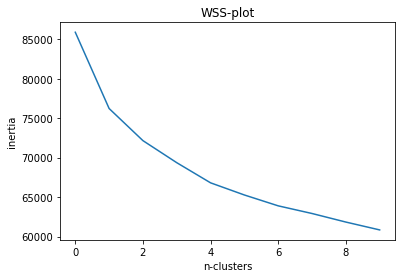

In [25]:
plt.plot(wss)
plt.xlabel('n-clusters')
plt.ylabel('inertia')
plt.title('WSS-plot')
plt.show()

You can see the elbow at 2 places cluster 1 and cluster 4

In [26]:
kmean = KMeans(random_state = 222, n_clusters=3).fit(sales_df_scaled)

In [27]:
kmean.labels_

array([2, 1, 1, ..., 0, 2, 2], dtype=int32)

In [28]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(sales_df_scaled, kmean.labels_)


0.08330856477373336

In [29]:
sil_width = silhouette_samples(sales_df_scaled, kmean.labels_)
sales_df['SilWidth'] = sil_width
sales_df['Cluster'] = kmean.labels_
sales_df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,...,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,SilWidth,Cluster
0,7000000,4409,21-39,4.000000,Agent,Salaried,Graduate,Female,3,Manager,...,20993.0,1,2.0,806761.000000,North,Half Yearly,5,2.0,0.073427,2
1,7000001,2214,1-20,2.000000,Third Party Partner,Salaried,Graduate,Male,4,Manager,...,20130.0,0,3.0,294502.000000,North,Yearly,7,3.0,0.040148,1
2,7000002,4273,21-39,4.000000,Agent,Free Lancer,Post Graduate,Male,4,Executive,...,17090.0,1,2.0,619999.699267,North,Yearly,0,3.0,0.050278,1
3,7000003,1791,1-20,14.469027,Third Party Partner,Salaried,Graduate,Female,3,Executive,...,17909.0,1,2.0,268635.000000,West,Half Yearly,0,5.0,0.111666,2
4,7000004,2955,1-20,14.469027,Agent,Small Business,Under Graduate,Male,3,Executive,...,18468.0,0,4.0,366405.000000,West,Half Yearly,2,5.0,0.137513,2


In [239]:
sales_df[sales_df['SilWidth'] <0]

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,...,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Cluster,SilWidth
21,7000021,4981,1-20,24.5,Agent,Small Business,Diploma,Female,3,Senior Manager,...,22639.000,0,1.0,826776.000,West,Half Yearly,9,3.0,0,-0.008547
35,7000035,5235,1-20,10.0,Agent,Small Business,Diploma,Female,3,Manager,...,20940.000,0,6.5,738135.000,West,Half Yearly,5,4.0,0,-0.043352
82,7000082,5146,21-39,5.0,Agent,Small Business,Under Graduate,Male,4,Manager,...,20582.000,0,6.0,902777.625,North,Yearly,8,3.0,0,-0.001510
100,7000100,4738,21-39,24.5,Third Party Partner,Small Business,Under Graduate,Male,3,Manager,...,19741.000,1,5.0,578016.000,West,Half Yearly,3,3.0,0,-0.008009
111,7000111,3994,1-20,24.0,Third Party Partner,Small Business,Diploma,Female,3,AVP-VP,...,28006.375,0,5.0,443279.000,North,Half Yearly,8,3.0,0,-0.017478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,7004447,5044,1-20,10.0,Agent,Salaried,Engineer,Male,2,Executive,...,21016.000,0,6.5,796927.000,North,Yearly,1,1.0,1,-0.005665
4461,7004461,4427,1-20,18.0,Third Party Partner,Small Business,Graduate,Female,5,Executive,...,21082.000,0,4.0,730491.000,North,Half Yearly,3,5.0,0,-0.049576
4504,7004504,4044,1-20,20.0,Agent,Large Business,Graduate,Male,4,Senior Manager,...,26957.000,0,5.0,784449.000,West,Yearly,7,5.0,0,-0.037633
4506,7004506,3835,1-20,15.0,Third Party Partner,Small Business,Diploma,Female,4,Manager,...,22560.000,0,6.5,713347.000,North,Half Yearly,8,3.0,0,-0.024548


We will consider 3 ultimate clusters as that is giving us very fewer negative silhouette widths than 4 clusters

Note: Positive silhouette width suggest that the observation belong to the correct cluster, negative would be opposite.

In [240]:
sales_df.groupby('Cluster').mean()

,CustID,AgentBonus,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,SilWidth
Cluster,,,,,,,,,,,,
0,7.002636e+06,5598.128727,18.596727,3.789091,3.841455,25619.695455,0.298182,4.512925,788822.765182,6.104727,3.114182,0.053366
1,7.002192e+06,3529.147982,11.920644,4.605381,3.551570,21540.073991,0.290583,3.174162,531443.433936,3.801794,3.005381,0.084321
2,7.002041e+06,3349.459113,11.190385,3.117734,3.395567,20960.395813,0.277833,3.052203,504027.790381,4.079310,3.068473,0.103034


In [37]:
sales_df.to_csv("AgentBonus.csv")

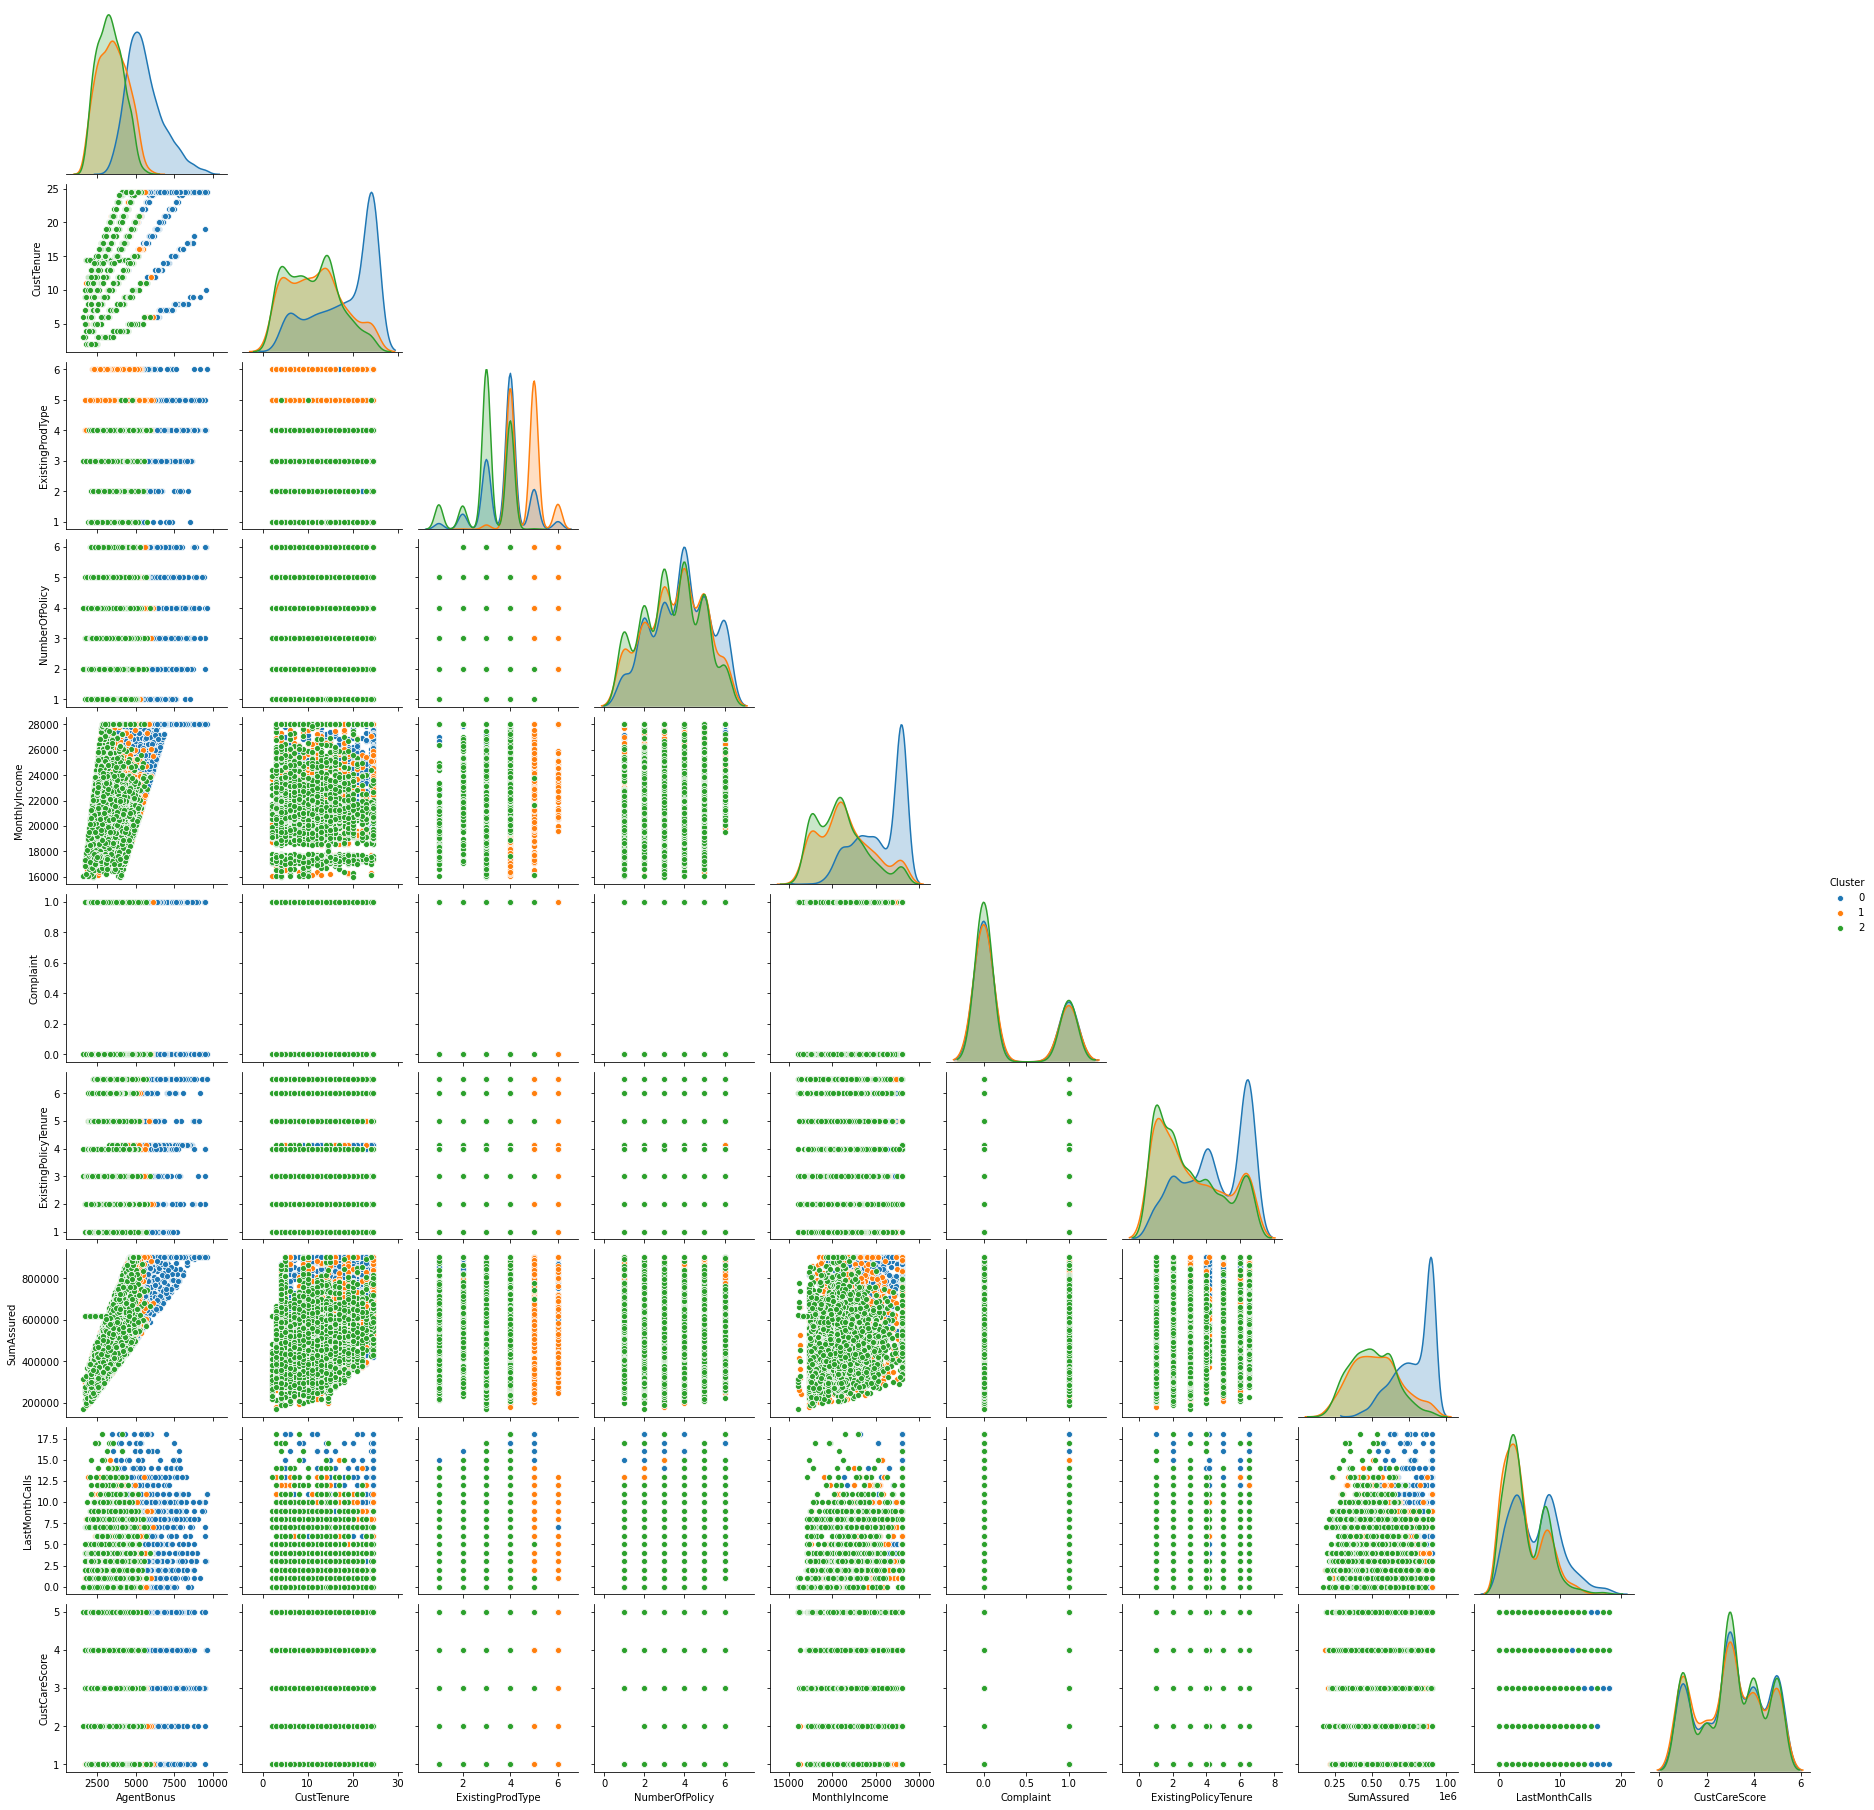

In [268]:
sns.pairplot(sales_df.iloc[:, 1:21], hue = 'Cluster', corner = True)
plt.show()

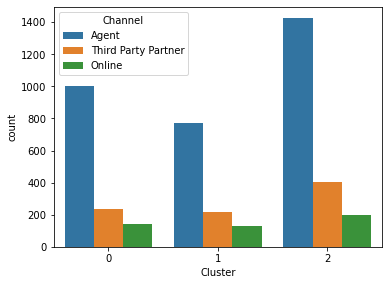

Agent                  0.706637
Third Party Partner    0.189823
Online                 0.103540
Name: Channel, dtype: float64


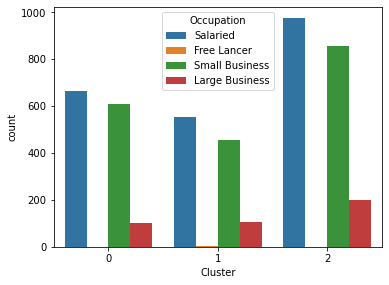

Salaried          0.484956
Small Business    0.424336
Large Business    0.090265
Free Lancer       0.000442
Name: Occupation, dtype: float64


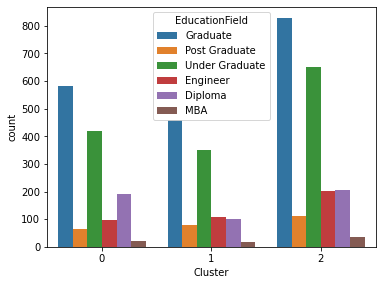

Graduate          0.413717
Under Graduate    0.314159
Diploma           0.109735
Engineer          0.090265
Post Graduate     0.055752
MBA               0.016372
Name: EducationField, dtype: float64


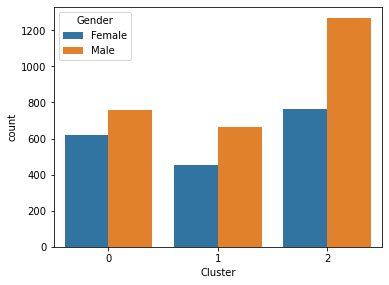

Male      0.59469
Female    0.40531
Name: Gender, dtype: float64


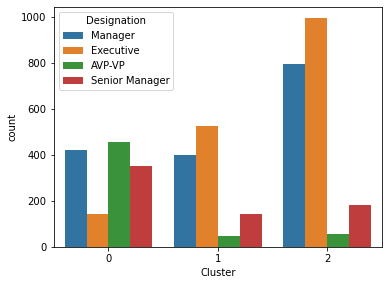

Executive         0.367699
Manager           0.358407
Senior Manager    0.149558
AVP-VP            0.124336
Name: Designation, dtype: float64


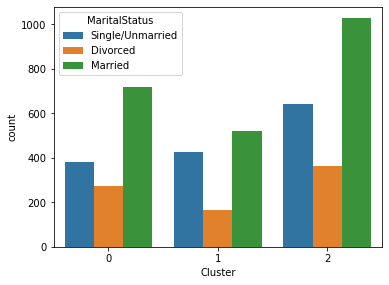

Married             0.501770
Single/Unmarried    0.320354
Divorced            0.177876
Name: MaritalStatus, dtype: float64


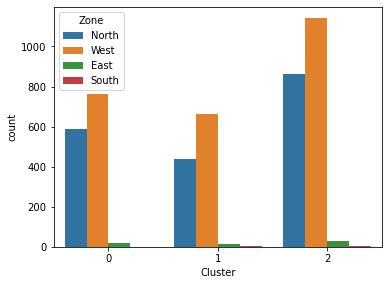

West     0.567699
North    0.416814
East     0.014159
South    0.001327
Name: Zone, dtype: float64


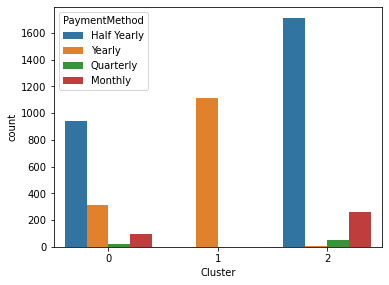

Half Yearly    0.587611
Yearly         0.317257
Monthly        0.078319
Quarterly      0.016814
Name: PaymentMethod, dtype: float64


In [259]:

i= 1

for col in sales_df.columns:
    if(sales_df[col].dtype == 'object'):
        fig = plt.figure(figsize= (20,15))
        ax = plt.subplot(3,3, i)
        sns.countplot('Cluster', hue = sales_df[col], ax = ax,linewidth=10, data = sales_df)
        plt.show()
        print(sales_df[col].value_counts(normalize= True))
        i = i+1

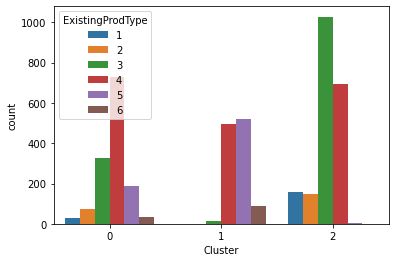

In [262]:
sns.countplot('Cluster', hue = 'ExistingProdType', data = sales_df)
plt.show()

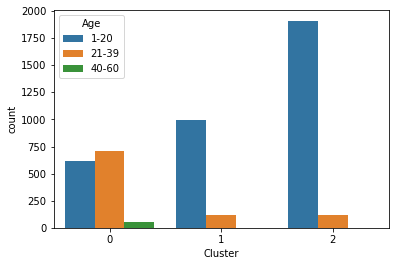

In [263]:
sns.countplot('Cluster', hue = 'Age', data = sales_df)
plt.show()

In [13]:
sales_df_encoded = sales_df.copy()
sales_df_encoded.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,21-39,4.000000,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single/Unmarried,20993.0,1,2.0,806761.000000,North,Half Yearly,5,2.0
1,7000001,2214,1-20,2.000000,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.000000,North,Yearly,7,3.0
2,7000002,4273,21-39,4.000000,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Single/Unmarried,17090.0,1,2.0,619999.699267,North,Yearly,0,3.0
3,7000003,1791,1-20,14.469027,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.000000,West,Half Yearly,0,5.0
4,7000004,2955,1-20,14.469027,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.000000,West,Half Yearly,2,5.0


In [14]:
for col in sales_df_encoded.columns:
    if (sales_df_encoded[col].dtypes == 'object'):
        sales_df_encoded = pd.get_dummies(sales_df_encoded, columns = [col], drop_first=True)

In [15]:
sales_df_encoded.head()

,CustID,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,...,Designation_Manager,Designation_Senior Manager,MaritalStatus_Married,MaritalStatus_Single/Unmarried,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,7000000,4409,21-39,4.000000,3,2.0,20993.0,1,2.0,806761.000000,...,1,0,0,1,1,0,0,0,0,0
1,7000001,2214,1-20,2.000000,4,4.0,20130.0,0,3.0,294502.000000,...,1,0,0,0,1,0,0,0,0,1
2,7000002,4273,21-39,4.000000,4,3.0,17090.0,1,2.0,619999.699267,...,0,0,0,1,1,0,0,0,0,1
3,7000003,1791,1-20,14.469027,3,3.0,17909.0,1,2.0,268635.000000,...,0,0,0,0,0,0,1,0,0,0
4,7000004,2955,1-20,14.469027,3,4.0,18468.0,0,4.0,366405.000000,...,0,0,0,0,0,0,1,0,0,0


In [16]:
sales_df_encoded = pd.get_dummies(sales_df_encoded, columns = ['Age', 'ExistingProdType'], drop_first=True)
sales_df_encoded.head()

,CustID,AgentBonus,CustTenure,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,...,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Age_21-39,Age_40-60,ExistingProdType_2,ExistingProdType_3,ExistingProdType_4,ExistingProdType_5,ExistingProdType_6
0,7000000,4409,4.000000,2.0,20993.0,1,2.0,806761.000000,5,2.0,...,0,0,0,1,0,0,1,0,0,0
1,7000001,2214,2.000000,4.0,20130.0,0,3.0,294502.000000,7,3.0,...,0,0,1,0,0,0,0,1,0,0
2,7000002,4273,4.000000,3.0,17090.0,1,2.0,619999.699267,0,3.0,...,0,0,1,1,0,0,0,1,0,0
3,7000003,1791,14.469027,3.0,17909.0,1,2.0,268635.000000,0,5.0,...,0,0,0,0,0,0,1,0,0,0
4,7000004,2955,14.469027,4.0,18468.0,0,4.0,366405.000000,2,5.0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
y = sales_df_encoded['AgentBonus']
sales_df_encoded.drop(['CustID', 'Complaint', 'AgentBonus'], inplace = True, axis = 1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(sales_df_encoded, y, test_size=0.25 , random_state=1)

In [19]:
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(3390, 36)

(3390,)

(1130, 36)

(1130,)

In [20]:
#zscore scaling
from scipy.stats import zscore
x_train_scaled = x_train.apply(zscore)
x_test_scaled = x_test.apply(zscore)

In [60]:
#grid for Decesion tree and RF

param_grid_dt ={ 'min_samples_split': [90, 75, 60],
              'min_samples_leaf' : [30, 25, 20],
              'max_depth': [7,10,14],
              'max_features' : [20, 30, 36]
    }

dt = DecisionTreeRegressor(random_state= 100)
    
grid_search_dt = GridSearchCV(estimator = dt, param_grid = param_grid_dt, cv= 3)

grid_search_dt.fit(x_train, y_train)
display("Dtree:", grid_search_dt.best_params_)


param_grid_rf ={ 'min_samples_split': [90, 75, 60],
              'min_samples_leaf' : [30, 25, 20],
              'max_depth': [7,10,14],
              'max_features' : [20, 30, 36],
              'n_estimators' : [100, 300]
    }

rf = RandomForestRegressor(random_state= 100)
    
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv= 3)

grid_search_rf.fit(x_train, y_train)
display("RF:", grid_search_rf.best_params_)

param_grid_grad ={ 'learning_rate': [0.1, 1.0, 0.01],
                   'max_features' : [20, 30, 36],
                   'n_estimators' : [100, 200]
    }

grad = GradientBoostingRegressor(random_state= 100)
    
grid_search_grad = GridSearchCV(estimator = grad, param_grid = param_grid_grad, cv= 3)

grid_search_grad.fit(x_train_scaled, y_train)
display("Grad Boost:", grid_search_grad.best_params_)

'Dtree:'

{'max_depth': 10,
 'max_features': 30,
 'min_samples_leaf': 20,
 'min_samples_split': 60}

'RF:'

{'max_depth': 10,
 'max_features': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 300}

'Grad Boost:'

{'learning_rate': 0.1, 'max_features': 36, 'n_estimators': 200}

In [28]:
display(grid_search_dt.score(x_train, y_train))
display(grid_search_dt.score(x_test, y_test))

display(grid_search_rf.score(x_train, y_train))
display(grid_search_rf.score(x_test, y_test))

0.8287553086345393

0.7855046556390536

0.8368430015435773

0.8036261272324992

In [26]:
#models

regression_model1 = LinearRegression()
regression_model2 = Ridge()
regression_model3 = Lasso()
regression_model4 = ElasticNet()
dt = DecisionTreeRegressor(random_state= 100, max_depth = 10,
                           max_features =30, min_samples_leaf = 20, min_samples_split = 60)

rf = RandomForestRegressor(random_state= 100, n_estimators = 100, max_depth = 10,
                           max_features =30, min_samples_leaf = 20, min_samples_split = 60)

bgg = BaggingRegressor(random_state=100, base_estimator= dt, n_estimators=100)
ada = AdaBoostRegressor(n_estimators=100, learning_rate=1.0, random_state= 100)
grad = GradientBoostingRegressor(random_state= 100, learning_rate=0.1, max_features= 36, n_estimators=200)
ann = MLPRegressor(random_state= 100, max_iter=1000, hidden_layer_sizes = 200, tol= 0.01)
er = VotingRegressor([('dt', dt), ('rf', rf), ('bgg', bgg), ('grad',grad)]) # votingregresseor for ensemble of the models 

mod = [regression_model1, regression_model2, regression_model3, regression_model4, dt, rf, bgg, ada, grad, ann, er]
scores_train = []
scores_test = []
RMSE_train = []
RMSE_test = []

for i in mod:
    if (i != [grad, ada, ann, er]):
        i.fit(x_train, y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        RMSE_train.append(np.sqrt(metrics.mean_squared_error(y_train,i.predict(x_train))))
        RMSE_test.append(np.sqrt(metrics.mean_squared_error(y_test,i.predict(x_test))))
    
    
    else:
        i.fit(x_train_scaled, y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        RMSE_train.append(np.sqrt(metrics.mean_squared_error(y_train,i.predict(x_train_scaled))))
        RMSE_test.append(np.sqrt(metrics.mean_squared_error(y_test,i.predict(x_test_scaled))))
    
        
                      
pd.DataFrame({'Train_Score': scores_train, 'Test_Score': scores_test, 'Train_RMSE': RMSE_train, 'TEST_RMSE': RMSE_test}, 
            index = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic-Net', 'Decesion Tree', 'Random Forest', 'Bagging', 'Adaptive Boosting', 'Gradient Boosting', 'ANN', 'VotingRegressor'])

,Train_Score,Test_Score,Train_RMSE,TEST_RMSE
Linear Regression,0.775354,0.763673,669.769247,667.418311
Ridge Regression,0.775321,0.763638,669.817653,667.468714
Lasso Regression,0.774622,0.764428,670.858992,666.351590
Elastic-Net,0.745945,0.727219,712.261275,717.048810
Decesion Tree,0.828755,0.785505,584.768531,635.844243
Random Forest,0.836912,0.800528,570.672390,613.172930
Bagging,0.836598,0.801014,571.221343,612.425561
Adaptive Boosting,0.776404,0.743879,668.201878,694.806685
Gradient Boosting,0.865355,0.804743,518.526497,606.660336
ANN,0.668717,0.655446,813.345987,805.880009


In [81]:
param_grid_mlp ={ 'hidden_layer_sizes' : [(200, 100), 200, 100],
                  'tol' : [0.01, 0.001, 0.0001]
                }

ann = MLPRegressor(random_state= 100, max_iter=1000)
    
grid_search_ann = GridSearchCV(estimator = ann, param_grid = param_grid_mlp, cv= 3)
grid_search_ann.fit(x_train_scaled, y_train)
display("ANN:", grid_search_ann.best_params_)

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbo

'ANN:'

{'hidden_layer_sizes': 200, 'tol': 0.01}

In [54]:
# Let us explore the coefficients for each of the independent attributes
print('The coefficient for:')
for idx, col_name in enumerate(x_train.columns):
     print('{} : {}'.format(col_name, regression_model.coef_[idx]))

The coefficient for:
CustTenure : 25.426471085269863
NumberOfPolicy : 0.6233842738636916
MonthlyIncome : 0.06776933404356836
ExistingPolicyTenure : 50.28731414954382
SumAssured : 0.0040955296774927855
LastMonthCalls : -4.396918533887952
CustCareScore : 10.297657820959648
Channel_Online : 14.368668391070095
Channel_Third Party Partner : -11.510279965003146
Occupation_Large Business : -355.82234152826493
Occupation_Salaried : -289.0778631182066
Occupation_Small Business : -363.00788228290395
EducationField_Engineer : -8.770386499250936
EducationField_Graduate : -42.1188413358815
EducationField_MBA : -122.54790488375063
EducationField_Post Graduate : -15.984581172787884
EducationField_Under Graduate : 14.42747520776906
Gender_Male : 26.623026902992557
Designation_Executive : -537.1314395746166
Designation_Manager : -567.0354289591228
Designation_Senior Manager : -469.80122551287104
MaritalStatus_Married : -36.09694423189079
MaritalStatus_Single/Unmarried : 24.146435243957143
Zone_North : 

In [63]:
pd.DataFrame({'Feature_Imp.' :grad.feature_importances_} , index = x_train.columns)

,Feature_Imp.
CustTenure,0.059578
NumberOfPolicy,0.001875
MonthlyIncome,0.152042
ExistingPolicyTenure,0.009896
SumAssured,0.728594
LastMonthCalls,0.003978
CustCareScore,0.001520
Channel_Online,0.000180
Channel_Third Party Partner,0.000189
Occupation_Large Business,0.000105
